In [132]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

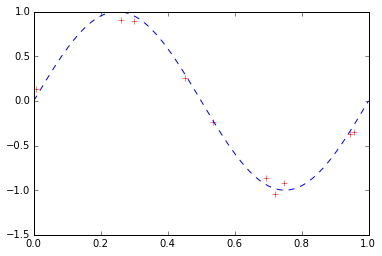

In [150]:
N_obs = 10
obs_std = 0.1
back_std = np.sqrt(0.5)
back_radius = 0.2

def truth(x):
    return np.sin(x*2*np.pi)

x_obs = np.random.rand(N_obs)
x_obs.sort()
f_obs = truth(x_obs) + obs_std*np.random.randn(N_obs)

plt.plot(x_obs, f_obs, 'r+')
x_grid = np.linspace(0, 1, 1001)
plt.plot(x_grid, truth(x_grid), 'b--')

In [151]:
# Observation Error Covariance Matrix
O = obs_std**2 * np.eye(N_obs)

In [152]:
# Background Error Covariance Matrix at observation points
dist2 = (x_obs[:,np.newaxis] - x_obs[np.newaxis,:])**2
B = back_std**2*np.exp(-dist2/back_radius**2)

In [153]:
# Background Error Covariance Matrix between grid and obs points
dist2 = (x_grid[:,np.newaxis] - x_obs[np.newaxis,:])**2
Bi = back_std**2*np.exp(-dist2/back_radius**2)

In [154]:
Bi.shape

(1001, 10)

In [155]:
f_A = np.dot(np.dot(Bi, np.linalg.inv(O + B)), f_obs)

In [156]:
EA = back_std**2 - np.diag(np.dot(np.dot(Bi, np.linalg.inv(O + B)), Bi.T))

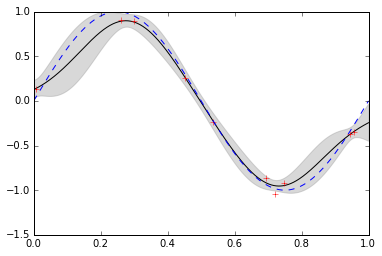

In [158]:
plt.plot(x_grid, f_A, '-k')
plt.plot(x_obs, f_obs, 'r+')
plt.plot(x_grid, truth(x_grid), '--b')

plt.fill_between(x_grid, f_A+np.sqrt(EA), f_A-np.sqrt(EA), color='0.5', alpha=0.3)

